<a href="">
    <img src="https://cdn-images-1.medium.com/max/1200/1*u16a0WbJeckSdi6kGD3gVA.jpeg" width = 400> 
</a>
<h1 align="center"><font size=5 color="DE5538">Breast Cancer</font></h1>

# Introduction
[Download kaggle Data Set here](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

### Table of Contents
<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3 color="black">

1. <a href="#item1">DataSet</a>

2. <a href="#item2">Relationship Visualization</a>    

3. <a href="#item3">Preprocessing</a>

4. <a href="#item3">Model</a>
</font>
</div>

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import Sklearn libraries
from sklearn import preprocessing, model_selection, feature_selection

# to make this notebook's output stable across runs
np.random.seed(2210)

# Set some options
pd.set_option("display.max_colwidth", 100)
sns.set_theme(style="whitegrid", palette="Set3")

# Set Matplotlib defaults
%matplotlib inline

# Load and explore the data

In [7]:
input_file = "data.csv"
df = pd.read_csv(input_file)
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [19]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


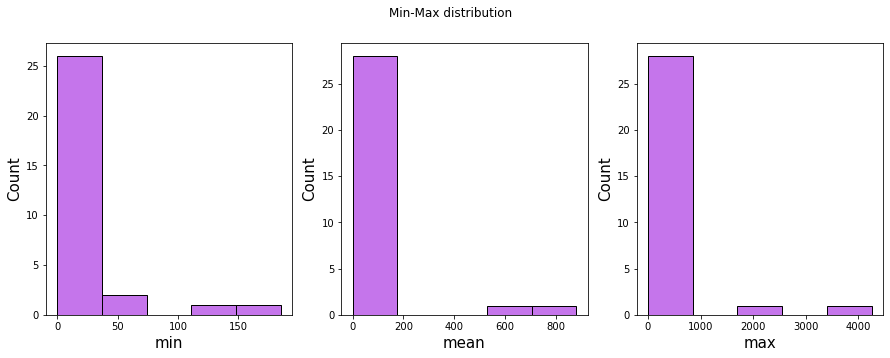

In [253]:
df_min_max = pd.concat(
    [df.describe().loc["min"], df.describe().loc["mean"], df.describe().loc["max"]],
    axis=1,
)

df_min_max.drop(df.columns[-1], inplace=True)
color = "#b753e6"
sns.reset_defaults()
sns.reset_orig()
sns.set_context(
    rc={
        "lines.linewidth": 5,
        #         "lines.markersize": 20,
        #         "axes.titlesize": 14,
        "axes.labelsize": 15,
        #         "xtick.labelsize": 8,
        #         "ytick.labelsize": 8,
        #         "xtick.major.size": 8,
        #         "ytick.major.size": 8,
    }
)

fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
fig.suptitle("Min-Max distribution")
for i, col in enumerate(df_min_max.columns.to_list()):
    sns.histplot(df_min_max[col], bins=5, ax=axs[i], color="#b753e6", alpha=0.8)
plt.show()

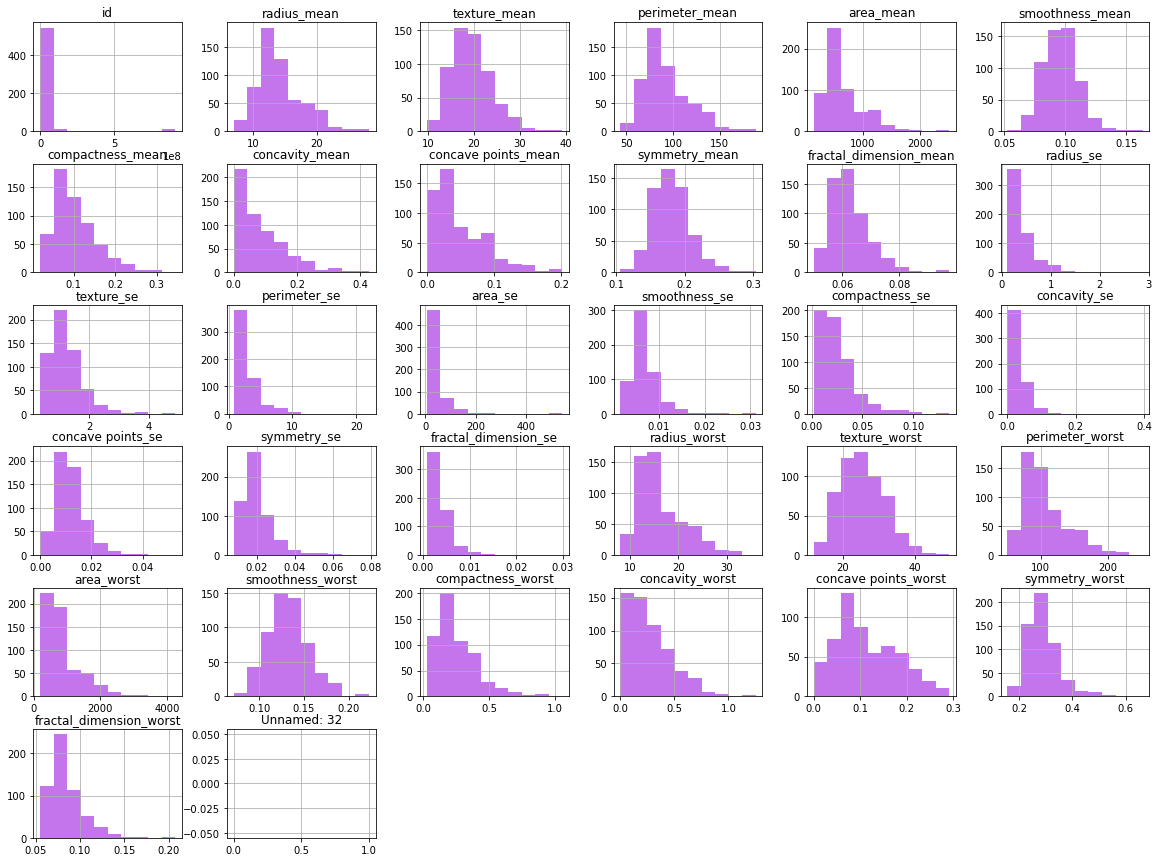

In [35]:
_ = df.hist(figsize=(20, 15), color="#b753e6", alpha=0.8)

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df=df, title="Pandas Profiling")
profile.to_widgets()
profile.to_notebook_iframe()

profile.to_html("data_profile.html")

In [13]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

## Observations
1. All columns have value preset and of type Float except Unnamed:32
2. diaognisis class is the one we have to predict
3. All numerical values are positive, we can apply Box-Cox transformer to unskew the data
4. Unnamed:32 column is not required and can be dropped
5. Id column can be dropped

In [8]:
import sys, os
from pathlib import Path
lib_dir = os.path.join(Path.home(), 'ml_framework')

sys.path.append(lib_dir)
from mllib import helper, charts, ml, metrics, features

In [9]:
def get_data():
    df = pd.read_csv(input_file)
    df.drop(["id", "Unnamed: 32"], axis=1, inplace=True)
    from sklearn.preprocessing import LabelEncoder

    le = LabelEncoder()
    # Return the dataframe
    le.fit(df["diagnosis"])
    df["diagnosis"] = le.transform(df["diagnosis"])

    # return dataframe
    return df, le

df, le = get_data()
X, y = df.drop("diagnosis", axis=1), df["diagnosis"].values
columns = X.columns.to_list()

X.shape, y.shape

((569, 30), (569,))

### Performannce with Scaling

In [10]:
import warnings 

warnings.filterwarnings('ignore')

#### Try various transformations and view the performance of classifiers

In [ ]:
encoding_list = features.NumericalFeatures.get_encoders_list()
cv = model_selection.StratifiedKFold(n_splits=5, shuffle=False)
# Split the data based on Stratified
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y)

def eval_clf_with_transformations(X, y, columns, encoding_list):
    clf_val_df = pd.DataFrame()
    clf_test_df = pd.DataFrame()

    # Loop for each encoding and save the results
    for encoding in encoding_list:
        encodings_features = {encoding: (columns, "mode")}
        num = features.NumericalFeatures(X, encodings_features)
        try:
            df_encoded = num.fit_transform()
            df_val_score, df_test_score, search_grids = ml.evaluate_classifiers(
                X_train, y_train, X_test, y_test, is_binary=True, cv=cv, sort_by="f1-score"
            )
            if clf_val_df is None:
                df_val_score["encoder"] = encoding
                df_test_score["encoder"] = encoding
                clf_val_df = df_val_score
                clf_test_df = df_test_score
            else:
                df_val_score["encoder"] = encoding
                df_test_score["encoder"] = encoding
                clf_val_df = pd.concat([clf_val_df, df_val_score])
                clf_test_df = pd.concat([clf_test_df, df_test_score])
        except ValueError as ve:
            # Skip box-cox as data may not be positive in some cases
            if encoding == 'box-cox':
                continue
    return clf_val_df, clf_test_df


clf_val_df, clf_test_df = eval_clf_with_transformations(X, y, X.columns.to_list(), encoding_list)

### Lets view the Validation and test performance with each transformation

In [14]:
clf_val_df.sort_values(by='mean_val_score', ascending=False)[:5]

,estimator,mean_val_score,std_val_score,mean_fit_time,mean_score_time,params,encoder
4,AdaBoostClassifier,0.971429,0.011207,0.140186,0.013008,{},min-max
4,AdaBoostClassifier,0.971429,0.011207,0.137660,0.012078,{},norm
4,AdaBoostClassifier,0.971429,0.011207,0.152933,0.011291,{},quantile
4,AdaBoostClassifier,0.971429,0.011207,0.154867,0.009942,{},yeo-johnson
4,AdaBoostClassifier,0.971429,0.011207,0.164549,0.011543,{},exp


In [15]:
# clf_test_df[clf_test_df['encoder'] == 'yeo-johnson'].sort_values(by='f1-score', ascending=False)[:5]
clf_test_df.sort_values(by='f1-score', ascending=False)

,estimator,params,accuracy,precision,recall,f1-score,roc_auc,log_loss,encoder
0,LightGBMClassifier,{},0.973684,0.953488,0.976190,0.964706,0.974206,0.908929,min-max
0,LightGBMClassifier,{},0.973684,0.953488,0.976190,0.964706,0.974206,0.908929,norm
0,LightGBMClassifier,{},0.973684,0.953488,0.976190,0.964706,0.974206,0.908929,quantile
0,LightGBMClassifier,{},0.973684,0.953488,0.976190,0.964706,0.974206,0.908929,yeo-johnson
0,LightGBMClassifier,{},0.973684,0.953488,0.976190,0.964706,0.974206,0.908929,exp
...,...,...,...,...,...,...,...,...,...
7,SVM,{},0.921053,0.945946,0.833333,0.886076,0.902778,2.726760,exp
7,SVM,{},0.921053,0.945946,0.833333,0.886076,0.902778,2.726760,robust
7,SVM,{},0.921053,0.945946,0.833333,0.886076,0.902778,2.726760,sqrt
7,SVM,{},0.921053,0.945946,0.833333,0.886076,0.902778,2.726760,reciprocal


### AdaBoost, LightGBM, XGBoost gave the best performance on the Test results
<li> We will use mix-max scalar as transformation
<li> Let's select only the limited features from the data and check on them

#### View the information gain of each column

In [16]:
from sklearn.feature_selection import mutual_info_classif

info_gain = pd.Series(mutual_info_classif(X, y), index=X.columns)
info_gain.sort_values(ascending=False)[:5]

perimeter_worst         0.476904
area_worst              0.464456
radius_worst            0.452354
concave points_mean     0.438645
concave points_worst    0.438214
dtype: float64

#### Select best 20 columns with Min-Max Scalar

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

select_best = SelectKBest(mutual_info_classif, 20)
select_best.fit(X, y)
best_columns = X.columns[select_best.get_support()].to_list()
X_best = X[best_columns]

# Split the data based on Stratified
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_best, y, test_size=0.2, stratify=y)
clf_val_df, clf_test_df = eval_clf_with_transformations(X, y, best_columns, ['min-max'])

In [18]:
clf_test_df

,estimator,params,accuracy,precision,recall,f1-score,roc_auc,log_loss,encoder
0,LightGBMClassifier,{},0.956140,0.951220,0.928571,0.939759,0.950397,1.514873,min-max
1,AdaBoostClassifier,{},0.956140,0.951220,0.928571,0.939759,0.950397,1.514873,min-max
2,XGBClassifier,{},0.947368,0.928571,0.928571,0.928571,0.943452,1.817851,min-max
3,RandomForestClassifier,{},0.947368,0.950000,0.904762,0.926829,0.938492,1.817844,min-max
4,GradinetBoostingClassifier,{},0.947368,0.950000,0.904762,0.926829,0.938492,1.817844,min-max
5,DecisionTreeClassifier,{},0.894737,0.826087,0.904762,0.863636,0.896825,3.635717,min-max
6,LogisticRegression,{},0.877193,0.868421,0.785714,0.825000,0.858135,4.241639,min-max
7,SVM,{},0.842105,0.900000,0.642857,0.750000,0.800595,5.453512,min-max


#### Use PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)

X_pca = pca.fit_transform(X_best)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_pca, y, test_size=0.2, stratify=y)
df_val_score, df_test_score, search_grids = ml.evaluate_classifiers(
    X_train, y_train, X_test, y_test, is_binary=True, cv=cv, sort_by="f1-score"
)

In [21]:
clf_test_df

,estimator,params,accuracy,precision,recall,f1-score,roc_auc,log_loss,encoder
0,LightGBMClassifier,{},0.956140,0.951220,0.928571,0.939759,0.950397,1.514873,min-max
1,AdaBoostClassifier,{},0.956140,0.951220,0.928571,0.939759,0.950397,1.514873,min-max
2,XGBClassifier,{},0.947368,0.928571,0.928571,0.928571,0.943452,1.817851,min-max
3,RandomForestClassifier,{},0.947368,0.950000,0.904762,0.926829,0.938492,1.817844,min-max
4,GradinetBoostingClassifier,{},0.947368,0.950000,0.904762,0.926829,0.938492,1.817844,min-max
5,DecisionTreeClassifier,{},0.894737,0.826087,0.904762,0.863636,0.896825,3.635717,min-max
6,LogisticRegression,{},0.877193,0.868421,0.785714,0.825000,0.858135,4.241639,min-max
7,SVM,{},0.842105,0.900000,0.642857,0.750000,0.800595,5.453512,min-max


## Fine Tuning 
Let's use best K-best columns RandomForest, Adaboost and XGBoost

In [24]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_best, y, test_size=0.2, stratify=y)
xgb_clf = ml.fine_tune_classifier('xgb', X_train, y_train, cv=cv, randomized=True )

Performing Randomized search for XGBClassifier...
[20:09:56] WARNING: ../src/learner.cc:541: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:09:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Time elapsed(s) : 5 Minutes 58 seconds | score : 0.96
Best parameters : {'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.25, 'gamma': 0.3, 'colsample_bytree': 0.3} 


In [25]:
ada_clf = ml.fine_tune_classifier('ada', X_train, y_train, cv=cv, randomized=True )

Performing Randomized search for AdaBoostClassifier...
Time elapsed(s) : 4 seconds | score : 0.96
Best parameters : {'n_estimators': 100, 'learning_rate': 0.25} 


In [26]:
rf_clf = ml.fine_tune_classifier('rf', X_train, y_train, cv=cv, randomized=True )

Performing Randomized search for RandomForestClassifier...
Time elapsed(s) : 1 seconds | score : 0.96
Best parameters : {'n_estimators': 10, 'max_features': 10, 'max_depth': None, 'bootstrap': True} 


### Final Prediction
Best parameters : {'min_child_weight': 7, 'max_depth': 3, 'learning_rate': 0.3, 'gamma': 0.4, 'colsample_bytree': 0.7} 

{'n_estimators': 500, 'learning_rate': 0.3} 

[21:47:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        72
           M       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



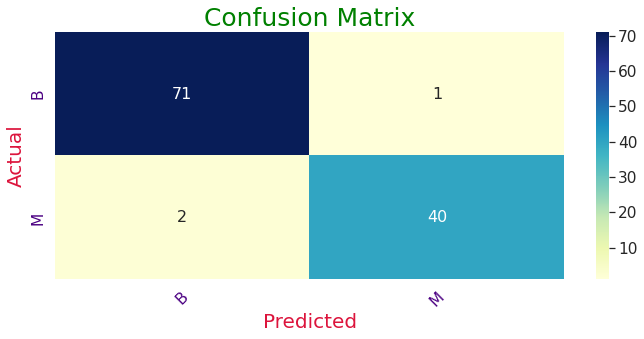

In [36]:
from xgboost import XGBClassifier
final_model = XGBClassifier(min_child_weight=7, max_depth=3, learning_rate=0.3,
                            gamma=0.4, colsample_bytree=0.7)
final_model.fit(X_train, y_train)
# final_model = xgb_clf
metrics.print_classification_score(final_model, X_test, y_test, le.classes_)